In [1]:
import google

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
df = pd.read_csv("Bitcoin_tweets.csv")

/Users/helenli/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,📊EMILY CRYPTOCURRENCIES INVESTMENT📈📉,United Kingdom,Forex and binary trader📉📈/Account Manager 📊/ad...,2016-05-10 15:43:04,3584.0,121.0,7206.0,False,2021-04-24 23:59:33,What we do here is #Bitcoin mining and binary ...,"['Bitcoin', 'btc']",Twitter for iPhone,False
1,🔶Enemy Of War ™️🔶 戦争の敵 🔶,"Ongs Hat, NJ USA",#Bitcoin | Entrepreneur | Anti War | Space ent...,2020-10-03 18:39:57,63.0,184.0,1803.0,False,2021-04-24 23:58:52,"@TheCryptoLark The dude is good at math, he sh...","['Bitcoin', 'BTC']",Twitter for iPhone,False
2,Tendongeo Ricardo Y.,NaN,NaN,2019-03-17 09:08:55,50.0,412.0,5.0,False,2021-04-24 23:56:07,Hi....you are one step into mining a free cryp...,"['bitcoin', 'btc', 'USTD', 'blockchain']",Twitter for Android,False
3,PGRA,NaN,Truth.,2011-11-16 16:37:05,66.0,198.0,4884.0,False,2021-04-24 23:56:05,#bitcoin is fucked. Any questions? #btc,"['bitcoin', 'btc']",Twitter for iPhone,False
4,Rendi_Rahtomo,"Bogor, Jawa Barat",love rock n rolls and never die|like joke| lov...,2011-02-27 13:34:55,43.0,283.0,244.0,False,2021-04-24 23:55:40,@SafeRocketToken Wish me good luck\n\n@gitawid...,"['giveaway', 'bitcoin', 'Berikan', 'cryptocurr...",Twitter Web App,False


In [5]:
df.shape

(106644, 13)

In [6]:
# Create a column to call out users with more than 10k followers
df = df[df['user_followers']> 50000.0] 
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
7,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 23:53:48,"Jackson, Tennessee, in ‘Prime Position’ to Be ...","['bitcoin', 'BTC']",bitcoinagile,False
423,That Martini Guy ₿,Monaco,99k Subscriber #Bitcoin & #Crypto News Youtube...,2016-10-03 14:11:43,69295.0,994.0,37821.0,False,2021-04-24 20:55:18,ALERT!!! ⚠️ DO NOT SHORT #BITCOIN!!! 🚨 ⚠️\n\n...,"['BITCOIN', 'BITCOIN', 'CRYPTO', 'ETH', 'BTC',...",Twitter Web App,False
474,TrendSpider,"Chicago, IL",Trading software designed to make technical an...,2018-03-02 13:52:02,118378.0,1213.0,25085.0,False,2021-04-24 20:30:05,#Bitcoin $BTCUSD #BTC Daily vs. weekly chart. ...,"['Bitcoin', 'BTC']",Agorapulse app,False
684,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,68184.0,754.0,1345.0,True,2021-04-24 19:18:22,Could Ethereum overtake Bitcoin as the world’s...,"['cryptocurrency', 'Bitcoin', 'Ethereum', 'Cry...",Twitter Web App,False
739,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 19:03:40,After The Crash Why #bitcoin Could Have More U...,"['bitcoin', 'btc', 'btcusd']",bitcoinagile,False


In [7]:
# Clean up date format to yyyy-mm-dd
df['date_cleaned']=pd.to_datetime(df['date'], format="%Y/%m/%d").dt.date
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,date_cleaned
7,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 23:53:48,"Jackson, Tennessee, in ‘Prime Position’ to Be ...","['bitcoin', 'BTC']",bitcoinagile,False,2021-04-24
423,That Martini Guy ₿,Monaco,99k Subscriber #Bitcoin & #Crypto News Youtube...,2016-10-03 14:11:43,69295.0,994.0,37821.0,False,2021-04-24 20:55:18,ALERT!!! ⚠️ DO NOT SHORT #BITCOIN!!! 🚨 ⚠️\n\n...,"['BITCOIN', 'BITCOIN', 'CRYPTO', 'ETH', 'BTC',...",Twitter Web App,False,2021-04-24
474,TrendSpider,"Chicago, IL",Trading software designed to make technical an...,2018-03-02 13:52:02,118378.0,1213.0,25085.0,False,2021-04-24 20:30:05,#Bitcoin $BTCUSD #BTC Daily vs. weekly chart. ...,"['Bitcoin', 'BTC']",Agorapulse app,False,2021-04-24
684,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,68184.0,754.0,1345.0,True,2021-04-24 19:18:22,Could Ethereum overtake Bitcoin as the world’s...,"['cryptocurrency', 'Bitcoin', 'Ethereum', 'Cry...",Twitter Web App,False,2021-04-24
739,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 19:03:40,After The Crash Why #bitcoin Could Have More U...,"['bitcoin', 'btc', 'btcusd']",bitcoinagile,False,2021-04-24


In [8]:
df.dropna(subset=['hashtags'], inplace=True)

df2 = df[['text']] 
df2.columns = ['tweets']
df2.head()

,tweets
7,"Jackson, Tennessee, in ‘Prime Position’ to Be ..."
423,ALERT!!! ⚠️ DO NOT SHORT #BITCOIN!!! 🚨 ⚠️\n\n...
474,#Bitcoin $BTCUSD #BTC Daily vs. weekly chart. ...
684,Could Ethereum overtake Bitcoin as the world’s...
739,After The Crash Why #bitcoin Could Have More U...


In [9]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])


print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package wordnet to /Users/helenli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/helenli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/helenli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def cleaning(data):
  #remove urls
  tweet_without_url = re.sub(r'http\S+',' ', data)

  #remove hashtags
  tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

  #3. Remove mentions and characters that not in the English alphabets
  tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
  precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
  tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)
    
    #3. Remove Puncs
  tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    
    #4. Removing Stopwords
  tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
  text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #6. Joining
  return " ".join(text_cleaned)

In [11]:
df2['cleaned_tweets'] = df2['tweets'].apply(cleaning)
df2.head()

<ipython-input-11-2148ea635fb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cleaned_tweets'] = df2['tweets'].apply(cleaning)


,tweets,cleaned_tweets
7,"Jackson, Tennessee, in ‘Prime Position’ to Be ...",Jackson Tennessee Prime Position Be Leader Say...
423,ALERT!!! ⚠️ DO NOT SHORT #BITCOIN!!! 🚨 ⚠️\n\n...,ALERT DO NOT SHORT In Todays Video PRICE ANALY...
474,#Bitcoin $BTCUSD #BTC Daily vs. weekly chart. ...,BTCUSD Daily v weekly chart Watch analysis nex...
684,Could Ethereum overtake Bitcoin as the world’s...,Could Ethereum overtake Bitcoin world leading ...
739,After The Crash Why #bitcoin Could Have More U...,After The Crash Why Could Have More Upside Pot...


In [12]:
df_final = pd.concat([df, df2], axis=1, join='inner')
df_final.head(20)
df_final.shape

(1432, 16)

In [13]:
df_final = df_final.drop(['text'], axis =1)

In [14]:
df_final = df_final.reset_index(drop=True)

In [15]:
df_final.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,date_cleaned,tweets,cleaned_tweets
0,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 23:53:48,"['bitcoin', 'BTC']",bitcoinagile,False,2021-04-24,"Jackson, Tennessee, in ‘Prime Position’ to Be ...",Jackson Tennessee Prime Position Be Leader Say...
1,That Martini Guy ₿,Monaco,99k Subscriber #Bitcoin & #Crypto News Youtube...,2016-10-03 14:11:43,69295.0,994.0,37821.0,False,2021-04-24 20:55:18,"['BITCOIN', 'BITCOIN', 'CRYPTO', 'ETH', 'BTC',...",Twitter Web App,False,2021-04-24,ALERT!!! ⚠️ DO NOT SHORT #BITCOIN!!! 🚨 ⚠️\n\n...,ALERT DO NOT SHORT In Todays Video PRICE ANALY...
2,TrendSpider,"Chicago, IL",Trading software designed to make technical an...,2018-03-02 13:52:02,118378.0,1213.0,25085.0,False,2021-04-24 20:30:05,"['Bitcoin', 'BTC']",Agorapulse app,False,2021-04-24,#Bitcoin $BTCUSD #BTC Daily vs. weekly chart. ...,BTCUSD Daily v weekly chart Watch analysis nex...
3,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,68184.0,754.0,1345.0,True,2021-04-24 19:18:22,"['cryptocurrency', 'Bitcoin', 'Ethereum', 'Cry...",Twitter Web App,False,2021-04-24,Could Ethereum overtake Bitcoin as the world’s...,Could Ethereum overtake Bitcoin world leading ...
4,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 19:03:40,"['bitcoin', 'btc', 'btcusd']",bitcoinagile,False,2021-04-24,After The Crash Why #bitcoin Could Have More U...,After The Crash Why Could Have More Upside Pot...


In [16]:
df_final.to_csv('Bitcoin_tweets_cleaned.csv')

In [17]:
#!pip install google-cloud-language


In [18]:
from google.cloud import language_v1

In [19]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/helenli/Downloads/bax493b-final-project-c82818e4b65c.json"

In [20]:
def get_sentiment_score(tweet):
    client = language_v1.LanguageServiceClient()
    document = language_v1.Document(content=tweet, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment_score = client\
                      .analyze_sentiment(document=document)\
                      .document_sentiment\
                      .score
    return sentiment_score

In [21]:
Sentiment_Score = []
for k in range(df_final['cleaned_tweets'].shape[0]):
    score = 0
    sentiment_score = get_sentiment_score(df_final['cleaned_tweets'][k])
    score += sentiment_score
    Sentiment_Score.append(sentiment_score)

In [22]:
Sentiment_Score = pd.DataFrame(Sentiment_Score)
Sentiment_Score.columns = ['Sentiment_Score']

In [23]:
df_final = pd.concat([df_final, Sentiment_Score], axis=1)
df_final.head(20)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,date_cleaned,tweets,cleaned_tweets,Sentiment_Score
0,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 23:53:48,"['bitcoin', 'BTC']",bitcoinagile,False,2021-04-24,"Jackson, Tennessee, in ‘Prime Position’ to Be ...",Jackson Tennessee Prime Position Be Leader Say...,0.1
1,That Martini Guy ₿,Monaco,99k Subscriber #Bitcoin & #Crypto News Youtube...,2016-10-03 14:11:43,69295.0,994.0,37821.0,False,2021-04-24 20:55:18,"['BITCOIN', 'BITCOIN', 'CRYPTO', 'ETH', 'BTC',...",Twitter Web App,False,2021-04-24,ALERT!!! ⚠️ DO NOT SHORT #BITCOIN!!! 🚨 ⚠️\n\n...,ALERT DO NOT SHORT In Todays Video PRICE ANALY...,-0.5
2,TrendSpider,"Chicago, IL",Trading software designed to make technical an...,2018-03-02 13:52:02,118378.0,1213.0,25085.0,False,2021-04-24 20:30:05,"['Bitcoin', 'BTC']",Agorapulse app,False,2021-04-24,#Bitcoin $BTCUSD #BTC Daily vs. weekly chart. ...,BTCUSD Daily v weekly chart Watch analysis nex...,0.0
3,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,68184.0,754.0,1345.0,True,2021-04-24 19:18:22,"['cryptocurrency', 'Bitcoin', 'Ethereum', 'Cry...",Twitter Web App,False,2021-04-24,Could Ethereum overtake Bitcoin as the world’s...,Could Ethereum overtake Bitcoin world leading ...,0.4
4,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 19:03:40,"['bitcoin', 'btc', 'btcusd']",bitcoinagile,False,2021-04-24,After The Crash Why #bitcoin Could Have More U...,After The Crash Why Could Have More Upside Pot...,0.0
5,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 19:00:31,"['Bitcoin', 'BTC']",bitcoinagile,False,2021-04-24,"Is the bull run over? BTC loses $50,000 as tra...",Is bull run BTC loses transaction fee surge Ho...,-0.6
6,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 18:12:26,"['crypto', 'btc', 'Altcoins', 'BearMarket', 'B...",bitcoinagile,False,2021-04-24,"Is the bull run over? BTC loses $50,000 as tra...",Is bull run BTC loses transaction fee surge,-0.7
7,IGSquawk,Global,From the trading floor - IG dealers share news...,2013-06-20 09:14:25,51670.0,659.0,1817.0,True,2021-04-24 17:51:22,"['BITCOIN', 'ETHER', 'BITCOINCASH', 'EOS', 'ST...",TweetDeck,False,2021-04-24,Crypto update:\n#BITCOIN 50103.60 -0.92%\n#E...,Crypto update,-0.4
8,LunarCRUSH Social Listening for Cryptocurrencies,"Orange County, California",Learn how social media impacts cryptocurrencie...,2018-04-25 04:04:50,74621.0,1181.0,29790.0,False,2021-04-24 17:31:22,"['bitcoin', 'btc']",Twitter for iPhone,False,2021-04-24,Trending $btc news with the most link shares a...,Trending btc news link share across social pos...,-0.2
9,LunarCRUSH Social Listening for Cryptocurrencies,"Orange County, California",Learn how social media impacts cryptocurrencie...,2018-04-25 04:04:50,74621.0,1181.0,29790.0,False,2021-04-24 17:25:47,"['Bitcoin', 'JoeBiden', 'btc']",Twitter for iPhone,False,2021-04-24,Top current trending $btc news with the most l...,Top current trending btc news link share acros...,-0.1


In [24]:
def getSentiment(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1

In [25]:
df_final['sentiment'] = df_final['Sentiment_Score'].apply(getSentiment)
df_final.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,date_cleaned,tweets,cleaned_tweets,Sentiment_Score,sentiment
0,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 23:53:48,"['bitcoin', 'BTC']",bitcoinagile,False,2021-04-24,"Jackson, Tennessee, in ‘Prime Position’ to Be ...",Jackson Tennessee Prime Position Be Leader Say...,0.1,1
1,That Martini Guy ₿,Monaco,99k Subscriber #Bitcoin & #Crypto News Youtube...,2016-10-03 14:11:43,69295.0,994.0,37821.0,False,2021-04-24 20:55:18,"['BITCOIN', 'BITCOIN', 'CRYPTO', 'ETH', 'BTC',...",Twitter Web App,False,2021-04-24,ALERT!!! ⚠️ DO NOT SHORT #BITCOIN!!! 🚨 ⚠️\n\n...,ALERT DO NOT SHORT In Todays Video PRICE ANALY...,-0.5,-1
2,TrendSpider,"Chicago, IL",Trading software designed to make technical an...,2018-03-02 13:52:02,118378.0,1213.0,25085.0,False,2021-04-24 20:30:05,"['Bitcoin', 'BTC']",Agorapulse app,False,2021-04-24,#Bitcoin $BTCUSD #BTC Daily vs. weekly chart. ...,BTCUSD Daily v weekly chart Watch analysis nex...,0.0,0
3,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,68184.0,754.0,1345.0,True,2021-04-24 19:18:22,"['cryptocurrency', 'Bitcoin', 'Ethereum', 'Cry...",Twitter Web App,False,2021-04-24,Could Ethereum overtake Bitcoin as the world’s...,Could Ethereum overtake Bitcoin world leading ...,0.4,1
4,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,57219.0,13527.0,5815.0,False,2021-04-24 19:03:40,"['bitcoin', 'btc', 'btcusd']",bitcoinagile,False,2021-04-24,After The Crash Why #bitcoin Could Have More U...,After The Crash Why Could Have More Upside Pot...,0.0,0


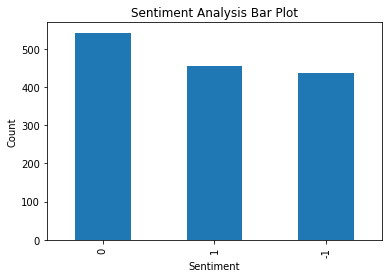

In [26]:
import matplotlib.pyplot as plt
# create a bar chart to show the cout of Positive, Neutral and Nehative sentiments
df_final['sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Bar Plot")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [27]:
average_sentiment = df_final.groupby("date_cleaned")["Sentiment_Score"].mean()

In [28]:
time_series_data = pd.DataFrame(average_sentiment)

In [29]:
def getthreshold(score):
  if score < -0.05:
    return -1
  else:
    return 1

In [30]:
time_series_data ['sentiment'] = time_series_data['Sentiment_Score'].apply(getthreshold)

In [31]:
time_series_data.reset_index(inplace=True)


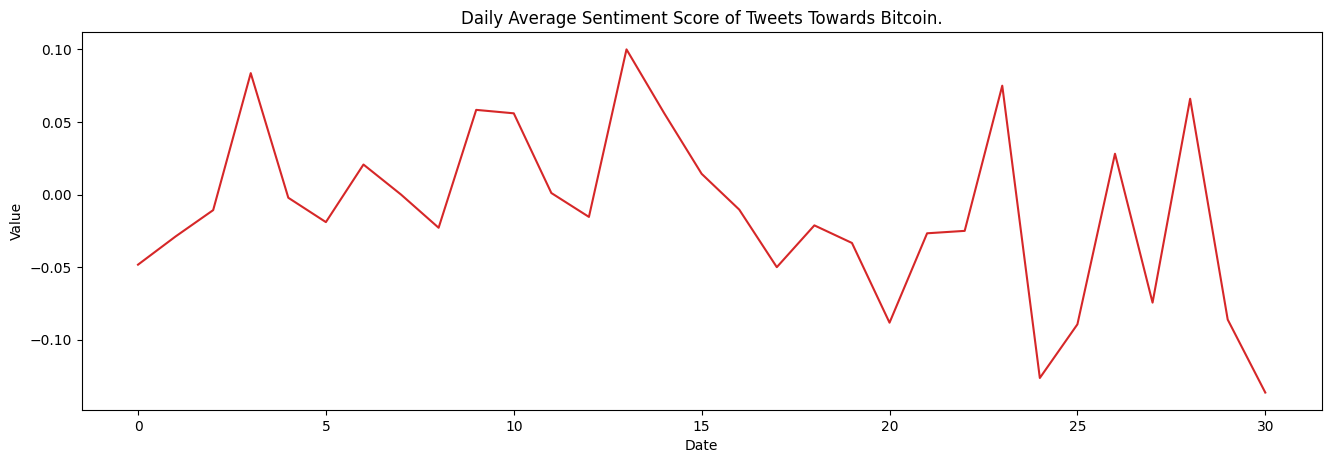

In [32]:
# Time series 
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(time_series_data, x=time_series_data.index, y=time_series_data.Sentiment_Score, title='Daily Average Sentiment Score of Tweets Towards Bitcoin.')    

In [33]:
btc = pd.read_csv('BTC_DAILY.csv')

In [34]:
btc.head()

,Date,Open,High,Low,Close
0,04/26/2021,"48,065","54,363","47,110","53,297"
1,04/25/2021,"50,955","51,113","48,075","48,075"
2,04/24/2021,"50,556","51,215","48,821","50,955"
3,04/23/2021,"51,597","52,220","47,657","50,620"
4,04/22/2021,"55,029","55,410","51,515","51,843"


In [35]:
btc = btc.replace(',','', regex=True)

btc.head()

,Date,Open,High,Low,Close
0,04/26/2021,48065,54363,47110,53297
1,04/25/2021,50955,51113,48075,48075
2,04/24/2021,50556,51215,48821,50955
3,04/23/2021,51597,52220,47657,50620
4,04/22/2021,55029,55410,51515,51843


In [36]:
btc['Close'] = btc['Close'].astype(float)
btc['Open'] = btc['Open'].astype(float)
btc['High'] = btc['High'].astype(float)
btc['Low'] = btc['Low'].astype(float)

btc['price_change'] = btc['Close'] - btc['Open']
btc['difference'] = btc['High'] - btc['Low']
# Clean up date format to yyyy-mm-dd
btc['Date'] = pd.to_datetime(btc['Date'], infer_datetime_format=True)
btc.head()

,Date,Open,High,Low,Close,price_change,difference
0,2021-04-26,48065.0,54363.0,47110.0,53297.0,5232.0,7253.0
1,2021-04-25,50955.0,51113.0,48075.0,48075.0,-2880.0,3038.0
2,2021-04-24,50556.0,51215.0,48821.0,50955.0,399.0,2394.0
3,2021-04-23,51597.0,52220.0,47657.0,50620.0,-977.0,4563.0
4,2021-04-22,55029.0,55410.0,51515.0,51843.0,-3186.0,3895.0


In [37]:
def getChange(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1

In [38]:
btc['change'] = btc['price_change'].apply(getChange)

In [39]:
btc.head()

,Date,Open,High,Low,Close,price_change,difference,change
0,2021-04-26,48065.0,54363.0,47110.0,53297.0,5232.0,7253.0,1
1,2021-04-25,50955.0,51113.0,48075.0,48075.0,-2880.0,3038.0,-1
2,2021-04-24,50556.0,51215.0,48821.0,50955.0,399.0,2394.0,1
3,2021-04-23,51597.0,52220.0,47657.0,50620.0,-977.0,4563.0,-1
4,2021-04-22,55029.0,55410.0,51515.0,51843.0,-3186.0,3895.0,-1


<AxesSubplot:title={'center':'Daily Average close prices of Bitcoin'}, xlabel='Date'>

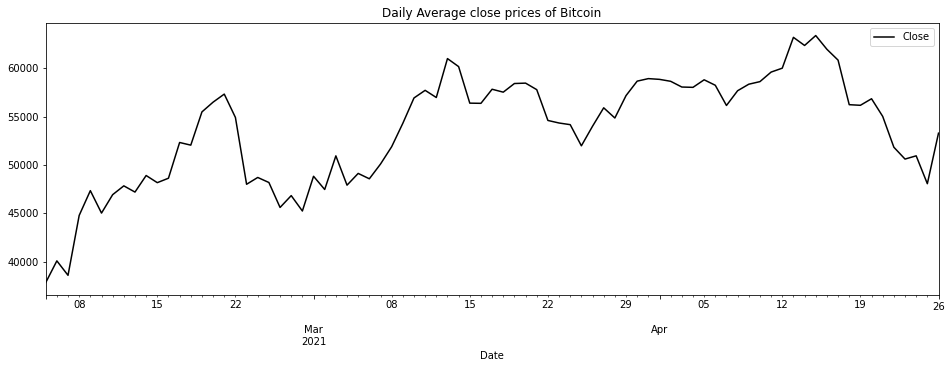

In [40]:
btc.plot(x="Date", y="Close",title='Daily Average close prices of Bitcoin', color = 'black', figsize = (16,5))


<AxesSubplot:title={'center':'Daily Average Price Change of Bitcoin'}, xlabel='Date'>

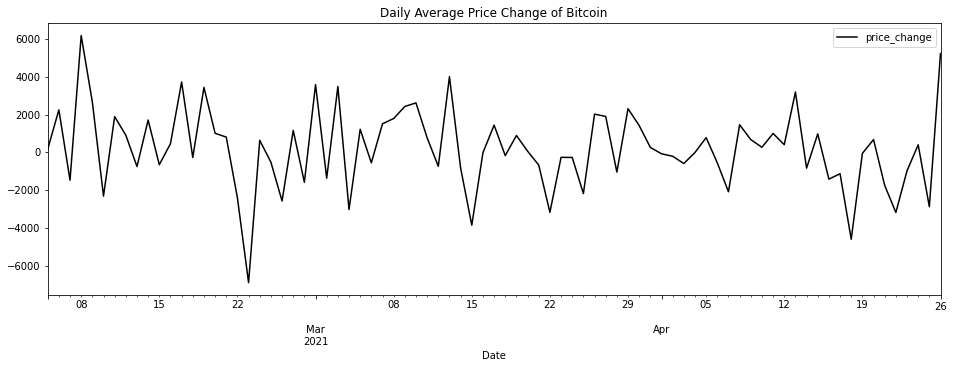

In [41]:
btc.plot(x="Date", y="price_change",title='Daily Average Price Change of Bitcoin', color = 'black', figsize = (16,5))


<AxesSubplot:title={'center':'Daily Average Difference of Bitcoin'}, xlabel='Date'>

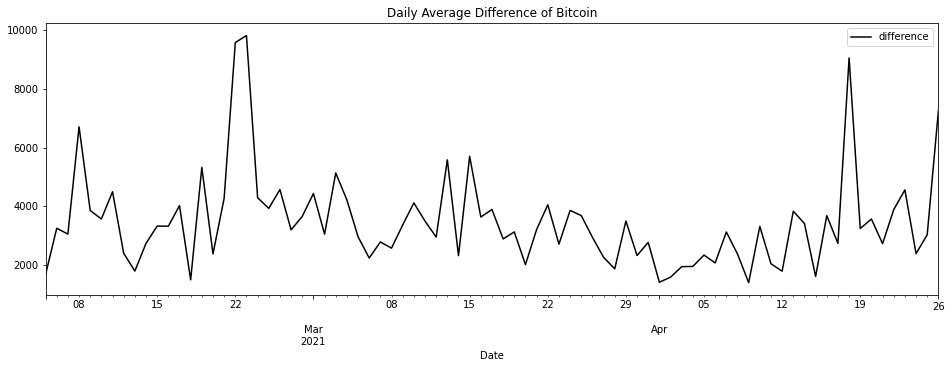

In [42]:
btc.plot(x="Date", y="difference",title='Daily Average Difference of Bitcoin', color = 'black', figsize = (16,5))


In [43]:
time_series_data.head()

,date_cleaned,Sentiment_Score,sentiment
0,2021-02-05,-0.048276,1
1,2021-02-06,-0.028846,1
2,2021-02-07,-0.010714,1
3,2021-02-08,0.083636,1
4,2021-02-09,-0.002198,1


In [79]:
df_join = btc.set_index('Date').join(time_series_data.set_index('date_cleaned'))
df_join.head()

,Open,High,Low,Close,price_change,difference,change,Sentiment_Score,sentiment
Date,,,,,,,,,
2021-04-26,48065.0,54363.0,47110.0,53297.0,5232.0,7253.0,1,NaN,NaN
2021-04-25,50955.0,51113.0,48075.0,48075.0,-2880.0,3038.0,-1,NaN,NaN
2021-04-24,50556.0,51215.0,48821.0,50955.0,399.0,2394.0,1,-0.136364,-1.0
2021-04-23,51597.0,52220.0,47657.0,50620.0,-977.0,4563.0,-1,-0.086111,-1.0
2021-04-22,55029.0,55410.0,51515.0,51843.0,-3186.0,3895.0,-1,0.066000,1.0


In [80]:
df_join = df_join.sort_values(by=["Date"])

In [81]:
df_join.reset_index(inplace=True)
df_join

,Date,Open,High,Low,Close,price_change,difference,change,Sentiment_Score,sentiment
0,2021-02-05,37687.0,38325.0,36642.0,37853.0,166.0,1683.0,1,-0.048276,1.0
1,2021-02-06,37853.0,40972.0,37714.0,40103.0,2250.0,3258.0,1,-0.028846,1.0
2,2021-02-07,40085.0,40481.0,37422.0,38610.0,-1475.0,3059.0,-1,-0.010714,1.0
3,2021-02-08,38610.0,44797.0,38085.0,44797.0,6187.0,6712.0,1,0.083636,1.0
4,2021-02-09,44692.0,48219.0,44356.0,47357.0,2665.0,3863.0,1,-0.002198,1.0
...,...,...,...,...,...,...,...,...,...,...
76,2021-04-22,55029.0,55410.0,51515.0,51843.0,-3186.0,3895.0,-1,0.066000,1.0
77,2021-04-23,51597.0,52220.0,47657.0,50620.0,-977.0,4563.0,-1,-0.086111,-1.0
78,2021-04-24,50556.0,51215.0,48821.0,50955.0,399.0,2394.0,1,-0.136364,-1.0
79,2021-04-25,50955.0,51113.0,48075.0,48075.0,-2880.0,3038.0,-1,NaN,NaN


In [83]:
df_join = df_join.dropna()

In [84]:
from sklearn import metrics
print ('Accuracy :', metrics.accuracy_score(df_join['change'], df_join['sentiment']) )
print ('F1 score :', metrics.f1_score(df_join['change'], df_join['sentiment']) )
print ('Recall   :', metrics.recall_score(df_join['change'], df_join['sentiment']) )
print ('Precision:', metrics.precision_score(df_join['change'], df_join['sentiment']) )

Accuracy : 0.5806451612903226
F1 score : 0.6666666666666667
Recall   : 0.8666666666666667
Precision: 0.5416666666666666


In [85]:
df_join.dtypes

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
price_change              float64
difference                float64
change                      int64
Sentiment_Score           float64
sentiment                 float64
dtype: object

In [49]:
df_join['change'].corr(df_join['Sentiment_Score'])

0.048086145919494526

In [50]:
df_join.dropna()
df_join['Close'].corr(df_join['Sentiment_Score'])


0.03764053428999194

In [51]:
df_join['Open'].corr(df_join['Sentiment_Score'])


-0.0585104467466866

In [52]:
df_join['price_change'].corr(df_join['Sentiment_Score'])


0.31911135844158417

In [53]:
df_join['difference'].corr(df_join['Sentiment_Score'])


-0.0303311199382604

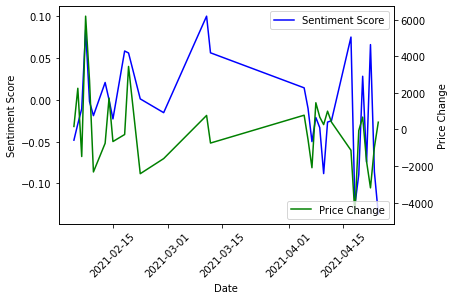

In [54]:
# different scales

t = df_join['Date']
data1 = df_join['Sentiment_Score']
data2 = df_join['price_change']

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score')
ax1.plot(t, data1, color='blue', label = "Sentiment Score")
ax1.tick_params(axis='y')
ax1.legend(loc=0)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price Change')  # we already handled the x-label with ax1
ax2.plot(t, data2, color='green', label = 'Price Change')
ax2.tick_params(axis='y')
ax2.legend(loc=4)

ax1.tick_params(axis='x', rotation=45)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [86]:
df_join = df_join.astype({'sentiment': 'int64'})

In [87]:
df_join.dtypes

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
price_change              float64
difference                float64
change                      int64
Sentiment_Score           float64
sentiment                   int64
dtype: object

[[ 5 11]
 [ 2 13]]


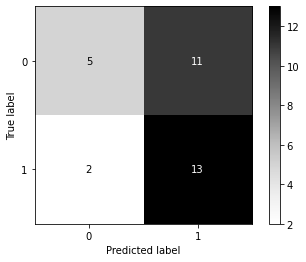

In [91]:
#generating confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(df_join['change'], df_join['sentiment'])
print(confusionMatrix)
diagram = metrics.ConfusionMatrixDisplay(confusionMatrix,display_labels=None)
diagram.plot(cmap = 'Greys')